In [1]:
##importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline

In [2]:
##loading the file

loan_train = pd.read_csv('loan_train.csv', index_col='Loan_ID')
loan_test =  pd.read_csv('loan_test.csv', index_col= 'Loan_ID')
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [3]:
loan_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
##the loan status contains some none value 
##replacing the NaN with 55
loan_test['Loan_Status']=-55

In [5]:
##combining the two segment of data for preprocessing 
df = pd.concat((loan_test,loan_train), sort= False)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,-55
LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,-55
LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,-55
LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,-55
LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,-55


In [6]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
male_applicants= df.loc[df['Gender']=='Male']
print(f'Total number of male applicant is:{len(male_applicants)}')
female_applicants= df.loc[df['Gender']=='Female']
print(f'Total number of female applicants is:{len(female_applicants)}')
total = len(df.loc[((df.Gender=='Male') | (df.Gender == 'Female'))])
print(f'the total number of applicant is {total}')

## Employment status has effect on loan application
self_employed_male_applicants= df.loc[((df.Gender =='Male') & (df.Self_Employed=='Yes')),:]
print(f'self employed male applicants is {len(self_employed_male_applicants)}')
self_employed_female_applicants= df.loc[((df.Gender =='Female') & (df.Self_Employed=='Yes')),:]
print(f'self employed female applicants is {len(self_employed_female_applicants)}')
employed_male_applicants = df.loc[((df.Gender== 'Male') & (df.Self_Employed=='No'))]
print(f'the total of employed male applicants is {len(employed_male_applicants)}')
employed_female_applicants = df.loc[((df.Gender== 'Female') & (df.Self_Employed=='No'))]
print(f'the total of employed female applicants is {len(employed_female_applicants)}')


Total number of male applicant is:775
Total number of female applicants is:182
the total number of applicant is 957
self employed male applicants is 94
self employed female applicants is 19
the total of employed male applicants is 637
the total of employed female applicants is 152


In [ ]:
## The probability of a selfemployed male to be selected is more than of a female

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


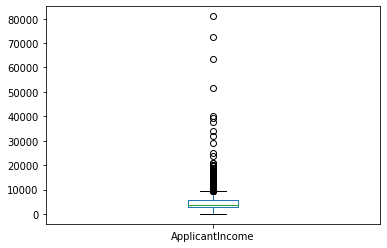

In [67]:
df.ApplicantIncome.plot(kind='box')

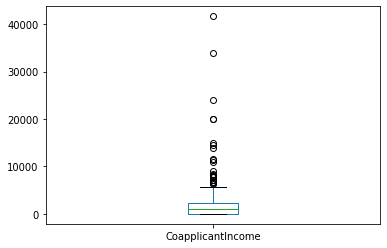

In [9]:
df.CoapplicantIncome.plot(kind='box')

In [ ]:
## the coapplicant median  income is less than that of the apllicant income 

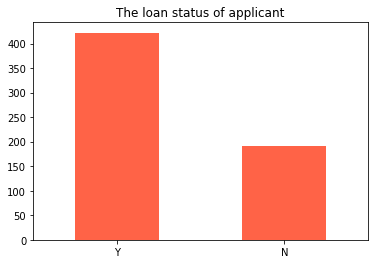

In [10]:
deloan = df[df.Loan_Status!=-55].Loan_Status.value_counts()
deloan.plot(kind='bar',rot=0,title='The loan status of applicant', color ='tomato');

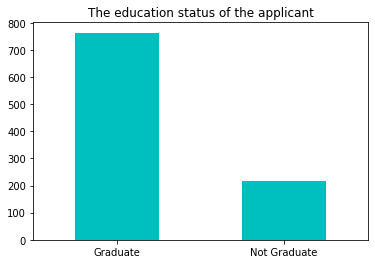

In [12]:
df.Education.value_counts().plot(kind='bar', rot=0, title='The education status of the applicant',color='c' )

In [11]:
df.describe(include='all')
#the mean of the applicant income is more than the co applicant which implies that a large amount will have a loan amount lower than the mean.


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,957,978,956,981,926,981.000000,981.000000,954.000000,961.000000,902.000000,981,981
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,3
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,775,631,545,763,807,NaN,NaN,NaN,NaN,NaN,349,422
mean,NaN,NaN,NaN,NaN,NaN,5179.795107,1601.916330,142.511530,342.201873,0.835920,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,5695.104533,2718.772806,77.421743,65.100602,0.370553,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2875.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3800.000000,1110.000000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5516.000000,2365.000000,162.000000,360.000000,1.000000,NaN,NaN


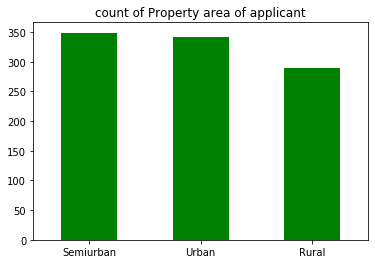

In [12]:
df.Property_Area.value_counts().plot(kind='bar', rot=0,title='count of Property area of applicant', color='g' )

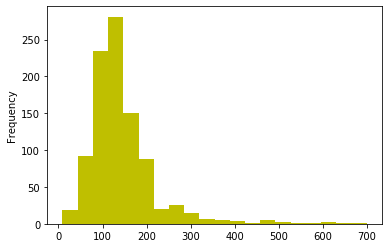

In [13]:
df.LoanAmount.plot(kind='hist', bins= 20, color='y')

In [14]:
df.groupby(['Gender','Education','Self_Employed']).LoanAmount.median()

Gender  Education     Self_Employed
Female  Graduate      No               112.0
                      Yes              141.5
        Not Graduate  No               112.0
                      Yes              131.5
Male    Graduate      No               134.0
                      Yes              150.0
        Not Graduate  No               115.0
                      Yes              130.0
Name: LoanAmount, dtype: float64

In [15]:
df.groupby(['Gender','Education','Self_Employed']).LoanAmount.mean()

Gender  Education     Self_Employed
Female  Graduate      No               122.852459
                      Yes              180.071429
        Not Graduate  No               109.111111
                      Yes              137.500000
Male    Graduate      No               149.711579
                      Yes              172.152778
        Not Graduate  No               117.133803
                      Yes              133.550000
Name: LoanAmount, dtype: float64

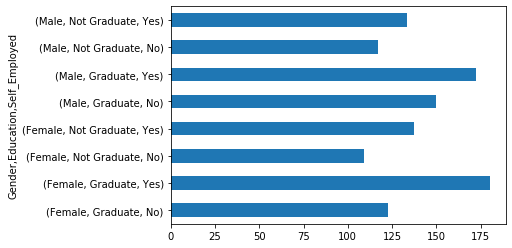

In [16]:
df.groupby(['Gender','Education','Self_Employed']).LoanAmount.mean().plot.barh()

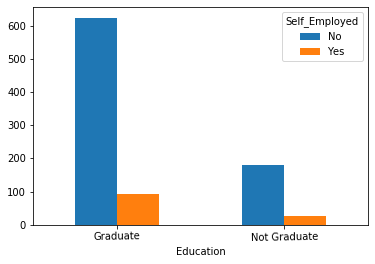

In [17]:
pd.crosstab(df.Education,df.Self_Employed).plot.bar(rot=1)

In [18]:
df.groupby(['Property_Area','Self_Employed','Dependents']).Credit_History.mean()

Property_Area  Self_Employed  Dependents
Rural          No             0             0.833333
                              1             0.833333
                              2             0.742857
                              3+            0.818182
               Yes            0             0.842105
                              1             0.777778
                              2             0.900000
                              3+            1.000000
Semiurban      No             0             0.848101
                              1             0.880952
                              2             0.871795
                              3+            0.681818
               Yes            0             0.941176
                              1             1.000000
                              2             0.600000
                              3+            1.000000
Urban          No             0             0.829787
                              1             0.886364
     